In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime
%matplotlib inline

In [4]:
def returns(prices):
    """
    Calulates the growth of 1 dollar invested in a stock with given prices
    """
    return (1 + prices.pct_change(1)).cumprod()

def drawdown(prices):
    """
    Calulates the drawdown of a stock with given prices
    """
    rets = returns(prices)
    return (rets.div(rets.cummax()) - 1) * 100

def cagr(prices):
    """
    Calculates the Compound Annual Growth Rate (CAGR) of a stock with given prices
    """
    delta = (prices.index[-1] - prices.index[0]).days / 365.25
    return ((prices[-1] / prices[0]) ** (1 / delta) - 1) * 100

CAGRs
SPY: 13.67%
UPRO: 32.64%


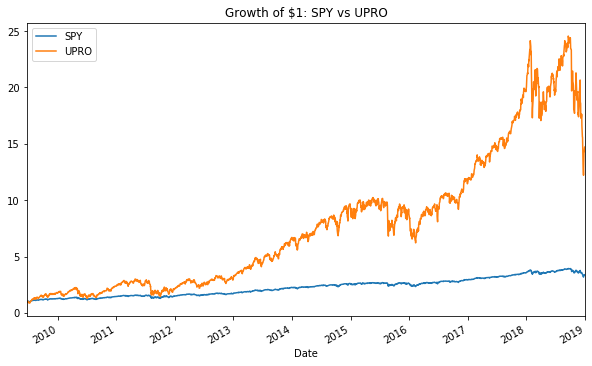

In [5]:
start = datetime.datetime(2009, 6, 23)
end = datetime.datetime(2019, 1, 1)

spy = web.DataReader("SPY", "yahoo", start, end)["Adj Close"]
upro = web.DataReader("UPRO", "yahoo", start, end)["Adj Close"]

spy_returns = returns(spy).rename("SPY")
upro_returns = returns(upro).rename("UPRO")

spy_returns.plot(title="Growth of $1: SPY vs UPRO", legend=True, figsize=(10,6))
upro_returns.plot(legend=True)

print("CAGRs")
print(f"SPY: {cagr(spy):.2f}%")
print(f"UPRO: {cagr(upro):.2f}%")

Max Drawdown
SPY: 2018-12-24 00:00:00 -19.35%
UPRO: 2011-10-03 00:00:00 -51.73%


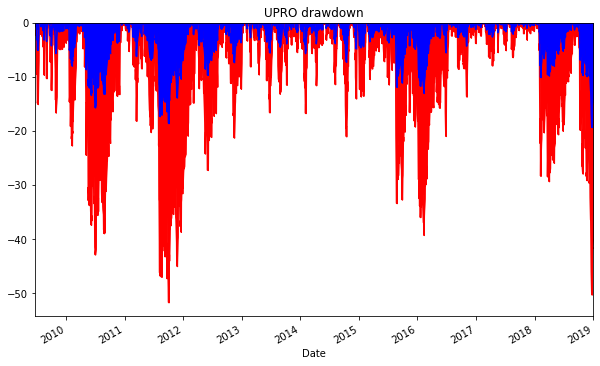

In [9]:
spy_drawdown = drawdown(spy)
upro_drawdown = drawdown(upro)
print("Max Drawdown")
print(f"SPY: {spy_drawdown.idxmin()} {spy_drawdown.min():.2f}%")
print(f"UPRO: {upro_drawdown.idxmin()} {upro_drawdown.min():.2f}%")
upro_drawdown.plot.area(color="red", title="UPRO drawdown", figsize=(10,6));
spy_drawdown.plot.area(color="blue", figsize=(10,6));

In [10]:
def sim_leverage(proxy, leverage=1, expense_ratio = 0.0, initial_value=1.0):
    pct_change = proxy.pct_change(1)
    pct_change = (pct_change - expense_ratio / 252) * leverage
    sim = (1 + pct_change).cumprod() * initial_value
    sim[0] = initial_value
    return sim

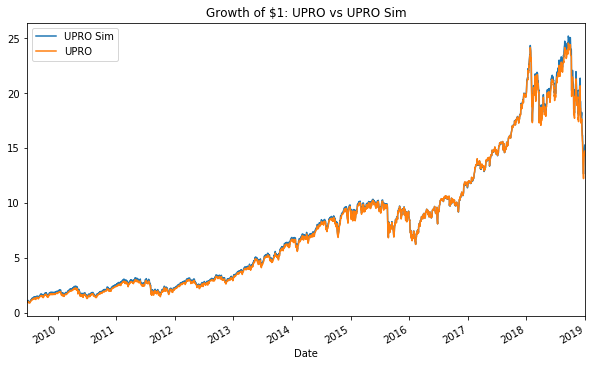

In [11]:
vfinx = web.DataReader("VFINX", "yahoo", start, end)["Adj Close"]
upro_sim = sim_leverage(vfinx, leverage=3.0, expense_ratio=0.0092).rename("UPRO Sim")
upro_sim.plot(title="Growth of $1: UPRO vs UPRO Sim", legend=True, figsize=(10,6))
upro_returns.plot(legend=True);

CAGRs
VFINX: 10.39%
UPRO Sim: 18.76%


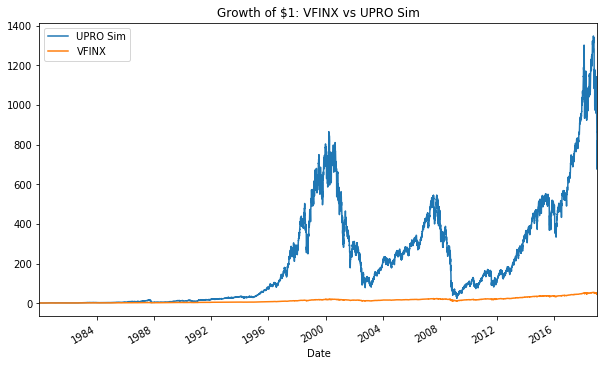

In [12]:
start = datetime.datetime(1976, 8, 31)
vfinx = web.DataReader("VFINX", "yahoo", start, end)["Adj Close"]
upro_sim = sim_leverage(vfinx, leverage=3.0, expense_ratio=0.0092).rename("UPRO Sim")
upro_sim.plot(title="Growth of $1: VFINX vs UPRO Sim", legend=True, figsize=(10,6))

vfinx_returns = returns(vfinx).rename("VFINX")
vfinx_returns.plot(legend=True)

print("CAGRs")
print(f"VFINX: {cagr(vfinx):.2f}%")
print(f"UPRO Sim: {cagr(upro_sim):.2f}%")

Max Drawdown
VFINX: 2009-03-09 00:00:00 -55.25%
UPRO Sim: 2009-03-09 00:00:00 -97.11%


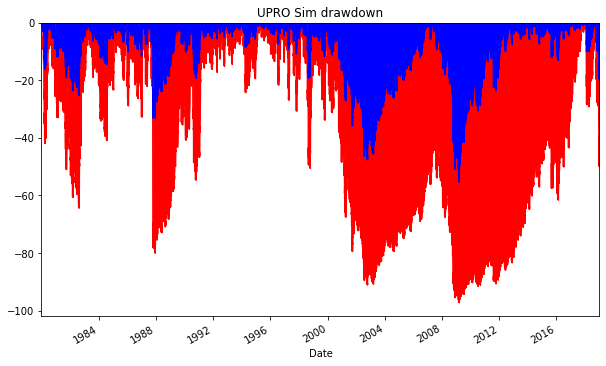

In [14]:
upro_sim_drawdown = drawdown(upro_sim)
vfinx_drawdown = drawdown(vfinx)

print("Max Drawdown")
print(f"VFINX: {vfinx_drawdown.idxmin()} {vfinx_drawdown.min():.2f}%")
print(f"UPRO Sim: {upro_sim_drawdown.idxmin()} {upro_sim_drawdown.min():.2f}%")
upro_sim_drawdown.plot.area(color="red", title="UPRO Sim drawdown", figsize=(10,6));
vfinx_drawdown.plot.area(color="blue",  figsize=(10,6));